In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [3]:
RealDataPath="Logging Data/real_data/"
SimulatedDataPath="Logging Data/ideal_data/"

def read_methods_and_litho(PathName):
    Dept=[]
    KS=[]
    PS=[]
    Lit=[]
    for i in range(1,38):
        if i==23:
            continue
        f = open(PathName+str(i)+'.txt', 'r')

        text_data = f.readlines()
        for text_line in text_data:
            data=text_line.split('\t')
            Dept=np.append(Dept,float(data[0]))
            KS=np.append(KS,float(data[1]))
            PS=np.append(PS,float(data[2]))
            Lit=np.append(Lit,int(data[3]))
    return Dept, KS, PS, Lit
    
Dept_r, KS_r, PS_r, Lit_r =read_methods_and_litho(RealDataPath)
Dept_s, KS_s, PS_s, Lit_s =read_methods_and_litho(SimulatedDataPath)

In [5]:
data={'Dept':Dept_s, 'KS':KS_s,'PS':PS_s,'Lit':Lit_s}

In [6]:
df=pd.DataFrame(data)
print(df)

        Dept       KS       PS  Lit
0      365.8  9.82171  12.7529  3.0
1      365.9  9.80834  12.5467  3.0
2      366.0  9.70564  11.5029  3.0
3      366.1  9.64986  10.8796  3.0
4      366.2  9.57150  11.8164  3.0
...      ...      ...      ...  ...
54795  508.6  5.76725  18.7729  6.0
54796  508.7  5.83802  17.3739  6.0
54797  508.8  5.84811  17.8807  6.0
54798  508.9  5.80305  18.3575  6.0
54799  509.0  5.76840  18.7568  6.0

[54800 rows x 4 columns]


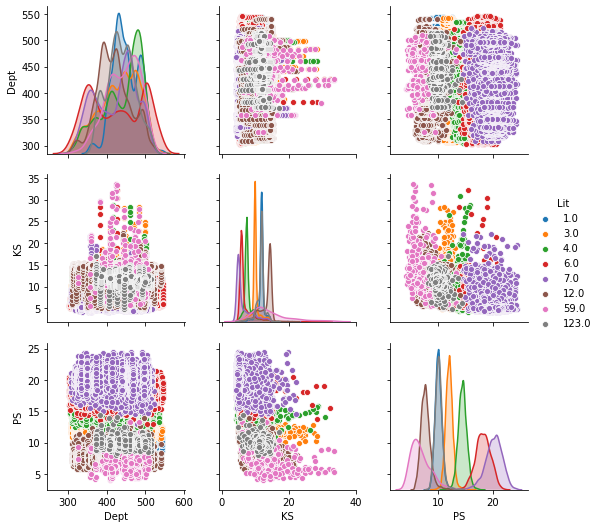

In [8]:
sns.pairplot( data=df, vars=('Dept','KS','PS'), hue='Lit' )

In [9]:
new_list=[]
for i in range (len(df.Lit)):
    new_list.append(int(str(df.Lit[i])[:1]))

In [10]:
df.insert(2, "nLit", new_list, True) 

In [11]:
df.head(-1)

,Dept,KS,nLit,PS,Lit
0,365.8,9.82171,3,12.7529,3.0
1,365.9,9.80834,3,12.5467,3.0
2,366.0,9.70564,3,11.5029,3.0
3,366.1,9.64986,3,10.8796,3.0
4,366.2,9.57150,3,11.8164,3.0
...,...,...,...,...,...
54794,508.5,5.76968,6,19.9812,6.0
54795,508.6,5.76725,6,18.7729,6.0
54796,508.7,5.83802,6,17.3739,6.0
54797,508.8,5.84811,6,17.8807,6.0


In [12]:
data1 = pd.DataFrame.from_dict(data)

In [13]:
df_norm = data1[['Dept', 'KS', 'PS']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(5)

,Dept,KS,PS
27396,0.683690,0.184493,0.380078
12395,0.411450,0.208107,0.404170
52470,0.644563,0.019862,0.686137
37428,0.502471,0.353130,0.152422
34042,0.568369,0.353494,0.176372


In [14]:
df.head(-1)

,Dept,KS,nLit,PS,Lit
0,365.8,9.82171,3,12.7529,3.0
1,365.9,9.80834,3,12.5467,3.0
2,366.0,9.70564,3,11.5029,3.0
3,366.1,9.64986,3,10.8796,3.0
4,366.2,9.57150,3,11.8164,3.0
...,...,...,...,...,...
54794,508.5,5.76968,6,19.9812,6.0
54795,508.6,5.76725,6,18.7729,6.0
54796,508.7,5.83802,6,17.3739,6.0
54797,508.8,5.84811,6,17.8807,6.0


In [15]:
df.nLit.unique().tolist()

[3, 1, 4, 7, 6, 5]

In [16]:
train, test = train_test_split(df, test_size = 0.3)
trainX = train[['Dept', 'KS', 'PS']]# taking the training data features
trainY=train.nLit# output of our training data
testX= test[['Dept', 'KS', 'PS']] # taking test data features
testY =test.nLit   #output value of test data
trainX.head(5)

,Dept,KS,PS
48087,389.6,14.59970,7.67865
17360,501.7,10.56050,12.61130
53466,375.7,10.02680,12.01420
43953,328.7,14.66200,6.72006
35738,453.3,8.28515,18.62460


In [17]:
trainY.head(5)

48087    1
17360    3
53466    3
43953    1
35738    6
Name: nLit, dtype: int64

In [18]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [19]:
clf.fit(trainX, trainY)
y_pred = clf.predict(testX)

Iteration 1, loss = inf
Iteration 2, loss = 1.39793059
Iteration 3, loss = 1.45178011
Iteration 4, loss = 1.31035554
Iteration 5, loss = 1.23033474
Iteration 6, loss = 1.23563853
Iteration 7, loss = 1.20519661
Iteration 8, loss = 1.10927915
Iteration 9, loss = 1.09387523
Iteration 10, loss = 1.03546540
Iteration 11, loss = 0.97337897
Iteration 12, loss = 1.04168281
Iteration 13, loss = 0.90869278
Iteration 14, loss = 0.85494681
Iteration 15, loss = 0.81059321
Iteration 16, loss = 0.79826424
Iteration 17, loss = 0.77294231
Iteration 18, loss = 0.73062462
Iteration 19, loss = 0.73709904
Iteration 20, loss = 0.71247910
Iteration 21, loss = 0.71075377
Iteration 22, loss = 0.69437553
Iteration 23, loss = 0.67025301
Iteration 24, loss = 0.66983524
Iteration 25, loss = 0.64956487
Iteration 26, loss = 0.65490890
Iteration 27, loss = 0.64490902
Iteration 28, loss = 0.62258938
Iteration 29, loss = 0.62956529
Iteration 30, loss = 0.59939410
Iteration 31, loss = 0.60643724
Iteration 32, loss = 0.5

In [20]:
prediction = clf.predict(testX)
print(prediction)

[1 1 3 ... 3 4 7]


In [21]:
print(testY.values)

[1 1 3 ... 3 4 6]


In [22]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(y_pred,testY))

The accuracy of the Multi-layer Perceptron is: 0.8571776155717762


In [23]:
df_norm.insert(2, "nLit", new_list, True) 

In [24]:
df_norm

,Dept,KS,nLit,PS
0,0.258649,0.192655,3,0.427570
1,0.259061,0.192200,3,0.417457
2,0.259473,0.188706,3,0.366261
3,0.259885,0.186808,3,0.335690
4,0.260297,0.184142,3,0.381638
...,...,...,...,...
54795,0.846787,0.054713,6,0.722834
54796,0.847199,0.057121,6,0.654217
54797,0.847611,0.057464,6,0.679074
54798,0.848023,0.055931,6,0.702460


In [25]:
train, test = train_test_split(df_norm, test_size = 0.3)
trainX = train[['Dept', 'KS', 'PS']]# taking the training data features
trainY=train.nLit# output of our training data
testX= test[['Dept', 'KS', 'PS']] # taking test data features
testY =test.nLit   #output value of test data
trainX.head(5)

,Dept,KS,PS
28899,0.857908,0.069888,0.398529
13098,0.700988,0.203555,0.376733
51692,0.324135,0.356509,0.242198
51237,0.136738,0.034870,0.523041
33583,0.379325,0.353117,0.139457


In [26]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [27]:
clf.fit(trainX, trainY)
y_pred = clf.predict(testX)

Iteration 1, loss = 1.52254763
Iteration 2, loss = 1.42201032
Iteration 3, loss = 1.37039799
Iteration 4, loss = 1.28997946
Iteration 5, loss = 1.15860711
Iteration 6, loss = 0.98145126
Iteration 7, loss = 0.80771659
Iteration 8, loss = 0.67498967
Iteration 9, loss = 0.58542738
Iteration 10, loss = 0.52349086
Iteration 11, loss = 0.47868284
Iteration 12, loss = 0.44508663
Iteration 13, loss = 0.41883180
Iteration 14, loss = 0.39727804
Iteration 15, loss = 0.37906344
Iteration 16, loss = 0.36372167
Iteration 17, loss = 0.35023203
Iteration 18, loss = 0.33885512
Iteration 19, loss = 0.32876513
Iteration 20, loss = 0.32015028
Iteration 21, loss = 0.31300087
Iteration 22, loss = 0.30664701
Iteration 23, loss = 0.30101477
Iteration 24, loss = 0.29617793
Iteration 25, loss = 0.29204681
Iteration 26, loss = 0.28834957
Iteration 27, loss = 0.28530133
Iteration 28, loss = 0.28241344
Iteration 29, loss = 0.28020212
Iteration 30, loss = 0.27817761
Iteration 31, loss = 0.27618207
Iteration 32, los

/Users/assanov.z/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [28]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(y_pred,testY))

The accuracy of the Multi-layer Perceptron is: 0.917396593673966


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
predictions = clf.predict(testX)
labels=[1,3,4,5,6,7]
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96      4775
           3       0.94      0.96      0.95      6462
           4       0.89      0.92      0.91      2389
           5       1.00      0.31      0.47        65
           6       0.78      0.74      0.76      1395
           7       0.79      0.80      0.80      1354

    accuracy                           0.92     16440
   macro avg       0.90      0.78      0.81     16440
weighted avg       0.92      0.92      0.92     16440

